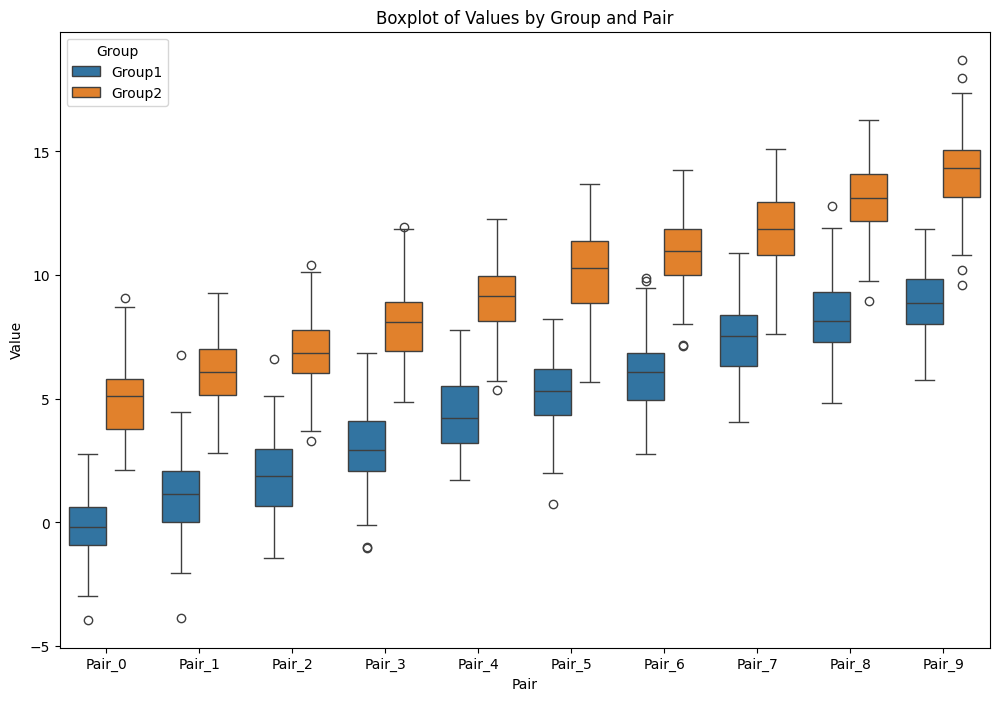

     pair   group     value
0  Pair_0  Group1  0.745071
1  Pair_0  Group1 -0.207396
2  Pair_0  Group1  0.971533
3  Pair_0  Group1  2.284545
4  Pair_0  Group1 -0.351230
['Group1' 'Group2']


In [8]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the data
np.random.seed(42)

num_pairs = 10
num_points = 100
consistent_diff = 5
mean_offset_step = 1

data = []

# Each group can have it's own mean and SD. Each pair can have its own difference. Sample these
def gen_data(num_pairs: int, num_points: int, group_mean: float, group_var: float, )

for i in range(num_pairs):
    mean1 = i * mean_offset_step
    mean2 = mean1 + consistent_diff
    std_dev = 1.5

    group1 = np.random.normal(loc=mean1, scale=std_dev, size=num_points)
    group2 = np.random.normal(loc=mean2, scale=std_dev, size=num_points)

    pair_data = pd.DataFrame({
        'pair': [f'Pair_{i}'] * 2 * num_points,
        'group': ['Group1'] * num_points + ['Group2'] * num_points,
        'value': np.concatenate([group1, group2])
    })
    
    data.append(pair_data)

all_data = pd.concat(data, ignore_index=True)

# Visualization
plt.figure(figsize=(12, 8))
sns.boxplot(x='pair', y='value', hue='group', data=all_data)
plt.title('Boxplot of Values by Group and Pair')
plt.xlabel('Pair')
plt.ylabel('Value')
plt.legend(title='Group')
plt.show()

# Display the data
print(all_data.head())
print(all_data['group'].unique())


In [9]:
# Fit a mixed-effects model
model = smf.mixedlm("value ~ group", all_data, groups=all_data["pair"], re_formula="~group")
result = model.fit()

# Display the results
print(result.summary())

                Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     value     
No. Observations:       2000        Method:                 REML      
No. Groups:             10          Scale:                  2.1948    
Min. group size:        200         Log-Likelihood:         -3657.7288
Max. group size:        200         Converged:              Yes       
Mean group size:        200.0                                         
----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                    4.612    0.983  4.690 0.000  2.684  6.539
group[T.Group2]              4.912    0.070 69.718 0.000  4.774  5.050
Group Var                    9.646    3.083                           
Group x group[T.Group2] Cov -0.218    0.165                           
group[T.Group2] Var    

/Users/mitchellmoore/Library/Caches/pypoetry/virtualenvs/stats-t-XWdXNh-py3.11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


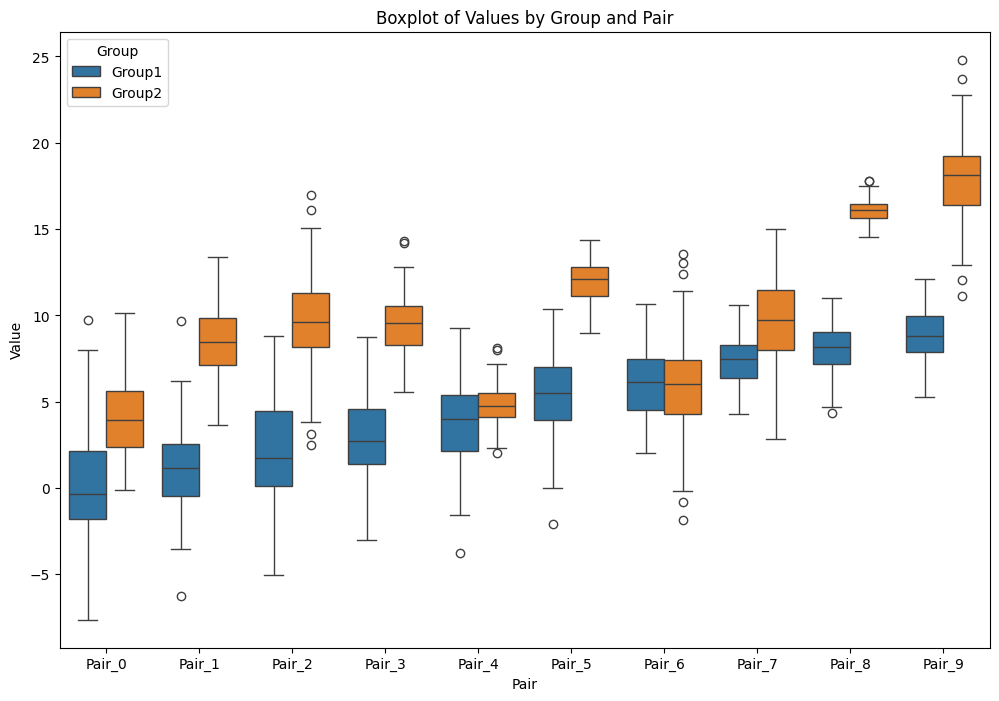

     pair   group     value
0  Pair_0  Group1 -3.198641
1  Pair_0  Group1  0.917413
2  Pair_0  Group1  0.802742
3  Pair_0  Group1  2.907036
4  Pair_0  Group1 -1.671062
                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     value     
No. Observations:      2000        Method:                 REML      
No. Groups:            10          Scale:                  4.6155    
Min. group size:       200         Log-Likelihood:         -4418.1168
Max. group size:       200         Converged:              Yes       
Mean group size:       200.0                                         
---------------------------------------------------------------------
                            Coef.  Std.Err.   z   P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                    4.540    0.977 4.649 0.000  2.626  6.455
group[T.Group2]              5.278    1.011 5.223 0.000  3.297  7.258
Group Va

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the data
num_pairs = 10
num_points = 100
mean_diff_range = (0, 10)  # Range for the possible differences between group means
std_dev_range = (0.5, 3)  # Range for the standard deviations

# Generate the data
data = []

for i in range(num_pairs):
    mean_diff = np.random.uniform(*mean_diff_range)
    mean1 = i  # Base mean for Group1
    mean2 = mean1 + mean_diff
    std_dev1 = np.random.uniform(*std_dev_range)
    std_dev2 = np.random.uniform(*std_dev_range)

    group1 = np.random.normal(loc=mean1, scale=std_dev1, size=num_points)
    group2 = np.random.normal(loc=mean2, scale=std_dev2, size=num_points)

    pair_data = pd.DataFrame({
        'pair': [f'Pair_{i}'] * 2 * num_points,
        'group': ['Group1'] * num_points + ['Group2'] * num_points,
        'value': np.concatenate([group1, group2])
    })
    
    data.append(pair_data)

all_data = pd.concat(data, ignore_index=True)

# Visualization
plt.figure(figsize=(12, 8))
sns.boxplot(x='pair', y='value', hue='group', data=all_data)
plt.title('Boxplot of Values by Group and Pair')
plt.xlabel('Pair')
plt.ylabel('Value')
plt.legend(title='Group')
plt.show()

# Display the first few rows of the data
print(all_data.head())


# Fit a mixed-effects model
model = smf.mixedlm("value ~ group", all_data, groups=all_data["pair"], re_formula="~group")
result = model.fit()

# Display the results
print(result.summary())

# Paired t-test
pairwise_diffs = []

for i in range(num_pairs):
    group1_values = all_data[(all_data['pair'] == f'Pair_{i}') & (all_data['group'] == 'Group1')]['value']
    group2_values = all_data[(all_data['pair'] == f'Pair_{i}') & (all_data['group'] == 'Group2')]['value']
    diff = group2_values.values - group1_values.values
    pairwise_diffs.extend(diff)


# Perform the paired t-test on the differences
t_test_result = stats.ttest_rel(pairwise_diffs, np.zeros_like(pairwise_diffs))
t_test_result = stats.ttest_1samp(pairwise_diff, popmean=0)
print('Paired t-test result:', t_test_result)

# Perform the Wilcoxon signed-rank test on the differences
wilcoxon_result = stats.wilcoxon(pairwise_diffs)
print('Wilcoxon signed-rank test result:', wilcoxon_result)

print(np.array(pairwise_diffs).mean())
